In [1]:
import pyscf
from pyscf import gto, dft, scf, fci

import numpy as np

from matplotlib import pyplot as plt

/home/ewonisch/NeuralQuantumStates/.venv/lib/python3.10/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


# DFT

In [14]:
d = [2.1095]
E = []

for d_ in d:
    mol = gto.M()
    mol.nelectron = 1
    # mol.build(atom = "H "+ str(-d_/2) +" 0 0; H " + str(d_/2) + " 0 0", basis = 'sto-3g', unit = "B", spin = 1, symmetry=True)
    mol.build(atom = "H "+ str(-d_/2) +" 0 0; H " + str(d_/2) + " 0 0", basis = '6311++g**', unit = "B", spin = 1, symmetry=True)

    mf = dft.RKS(mol)
    mf.xc = "lda,vwn"
    mf = mf.newton()
    E.append(mf.kernel())

converged SCF energy = -0.583861164977917


# HF

In [3]:
# Define the molecular geometry
mol = gto.Mole()
mol.atom = '''
H 0 0 0
H 0 0 1
'''
mol.charge = 1  # For the H2+ ion.
mol.spin = 1    # One unpaired electron.
mol.basis = 'sto-3g'  # Example basis set; others can be used.
mol.build()

 # Perform a restricted Hartree-Fock calculation for open-shell systems (ROHF)
mf = scf.ROHF(mol)
energy = mf.kernel()

print(f"Ground state energy of H2+ ion: {energy:.6f} Hartree")

converged SCF energy = -0.581666968963727
Ground state energy of H2+ ion: -0.581667 Hartree


# FCI

In [62]:
# Define the molecular geometry
dist = 2.003030303030303
mol = gto.Mole()
mol.atom = "H 0 0 0\n H 0 0 " + str(dist)
mol.charge = 0  # For the H2 molecule.
mol.spin = 0   # no unpaired electron.
mol.basis = "augccpvtz"
mol.unit = "B"
mol.build()

myhf = mol.RHF().run()
cisolver = pyscf.fci.FCI(myhf)
print('E(FCI) = %.12f' % cisolver.kernel()[0])

converged SCF energy = -1.09089673620383
E(FCI) = -1.136472793542


In [60]:
mol.nelectron

2

In [61]:
cisolver.kernel()[0]

-1.1367403452046039

## Scan Atomic Distances

In [59]:
ds = np.linspace(0.7, 5, num = 100)
Es = []

for dist in ds:
    # Define the molecular geometry
    mol = gto.Mole()
    mol.atom = "H 0 0 0\n H 0 0 " + str(dist)
    mol.charge = 1  # For the H2+ ion.
    mol.spin = 1    # One unpaired electron.
    mol.basis = "augccpvtz"
    mol.unit = "B"
    mol.build()

    myhf = mol.RHF().run()
    cisolver = pyscf.fci.FCI(mol, myhf.mo_coeff)
    Es.append(cisolver.kernel()[0])

converged SCF energy = -0.180390457474204
converged SCF energy = -0.23907097372976
converged SCF energy = -0.289172603875313
converged SCF energy = -0.332150608177299
converged SCF energy = -0.369164809107919
converged SCF energy = -0.401149650500645
converged SCF energy = -0.42886545829735
converged SCF energy = -0.452936455372622
converged SCF energy = -0.473879297941849
converged SCF energy = -0.492124748310579
converged SCF energy = -0.50803432605343
converged SCF energy = -0.521913247893279
converged SCF energy = -0.53402059465853
converged SCF energy = -0.544577381650253
converged SCF energy = -0.553773023671881
converged SCF energy = -0.561770555239998
converged SCF energy = -0.568710874072882
converged SCF energy = -0.574716210344026
converged SCF energy = -0.579892977172727
converged SCF energy = -0.584334123612407
converged SCF energy = -0.588121085969895
converged SCF energy = -0.591325413922258
converged SCF energy = -0.59401013277106
converged SCF energy = -0.5962308911008

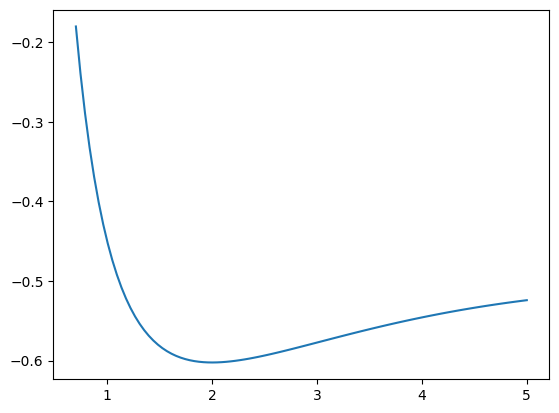

In [60]:
plt.plot(ds, Es)

In [1]:
np.min(Es)

NameError: name 'np' is not defined